<a href="https://colab.research.google.com/github/yanncoadou/MLtutorials/blob/main/ML_IDPASC2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>IDPASC 2021 Machine learning hands-on</h1>

# Standard imports and practical functions

In [2]:
# scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification, make_circles
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, accuracy_score, roc_auc_score, roc_curve, RocCurveDisplay

%matplotlib inline
import seaborn as sns # seaborn for nice plots
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
np.random.seed(31415) # set the np random seed for reproducibility

### Function to plot decision contours

In [3]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

def my_plot_decision_regions(model, X, y, alpha=1.0, size=25, npts=10000, zoom=0.25, event5=False):

  x1min = X_test[:,0].min() - zoom
  x1max = X_test[:,0].max() + zoom

  x2min = X_test[:,1].min() - zoom
  x2max = X_test[:,1].max() + zoom
  
  x1 = np.random.uniform(x1min, x1max, npts)
  x2 = np.random.uniform(x2min, x2max, npts)

  if hasattr(model, "predict_proba"):
    z = model.predict_proba(np.vstack((x1,x2)).T)
  else:
    z = model.predict(np.vstack((x1,x2)).T)
  
  if len(z.shape) == 2:
    if z.shape[1] == 1:
      z = z.reshape(-1)
    elif z.shape[1] == 2:
      z = z[:,1].reshape(-1)

  fig, ax = plt.subplots()

  bottom = cm.get_cmap('Oranges', 128)
  top = cm.get_cmap('Blues_r', 128)

  newcolors = np.vstack((top(np.linspace(0, 1, 128+128)[-128:]),
                        bottom(np.linspace(0, 1, 128+128)[:128])))
  newcmp = ListedColormap(newcolors, name='OrangeBlue')


  ax.tricontour(x1, x2, z, levels=np.linspace(0.0-np.finfo(float).eps,1.0+np.finfo(float).eps,20,True), linewidths=0.1, colors='k', antialiased=True)
  cntr = ax.tricontourf(x1, x2, z, levels=np.linspace(0.0-np.finfo(float).eps,1.0+np.finfo(float).eps,20,True), cmap=newcmp)
  sctr0 = ax.scatter(X[y==0][:,0], X[y==0][:,1], alpha=alpha, s=size, c="#1f77b4", marker="s", edgecolors="k", linewidths=0.5)
  sctr1 = ax.scatter(X[y==1][:,0], X[y==1][:,1], alpha=alpha, s=size, c="#ff7f0e",  marker="^", edgecolors="k", linewidths=0.5)
  if event5: # showing particular swinger event
    sctr2 = ax.scatter(X[4][0], X[4][1], alpha=1, s=size*10, c="lightgreen",  marker="X", edgecolors="k", linewidths=1)
  fig.colorbar(cntr, ax=ax)
  # ax.set(xlim=(x1min, x1max), ylim=(x2min, x2max))

  plt.show()

### Function to plot ROC curve

In [4]:
def my_plot_roc_curve(model, X_test, y_test):
  if hasattr(model, "predict_proba"):
    y_scores = model.predict_proba(X_test)
  else:
    y_scores = model.predict(X_test)

  if len(y_scores.shape) == 2:
    if y_scores.shape[1] == 1:
      y_scores = y_scores.reshape(-1)
    elif y_scores.shape[1] == 2:
      y_scores = y_scores[:,1].reshape(-1)
  fpr, tpr, _ = roc_curve(y_test, y_scores)
  roc_auc = roc_auc_score(y_test, y_scores)
  plt.clf()
  display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=model.__class__.__name__)
  display.plot()
  plt.plot([0, 1], [0, 1], color='black', linestyle='--')
  plt.show()

# Classifier zoo

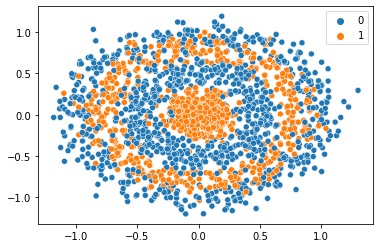

In [5]:
# X = (x,y) coordinates; y = class
X1, y1 = make_circles(n_samples=1000, noise=0.1, factor=0.8)
X2, y2 = make_circles(n_samples=1000, noise=0.2, factor=0.2)
X = np.vstack((X1,X2/2))
y = np.hstack((y1,y2))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y);

### Decision tree

In [6]:
from sklearn.tree import DecisionTreeClassifier

In [7]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

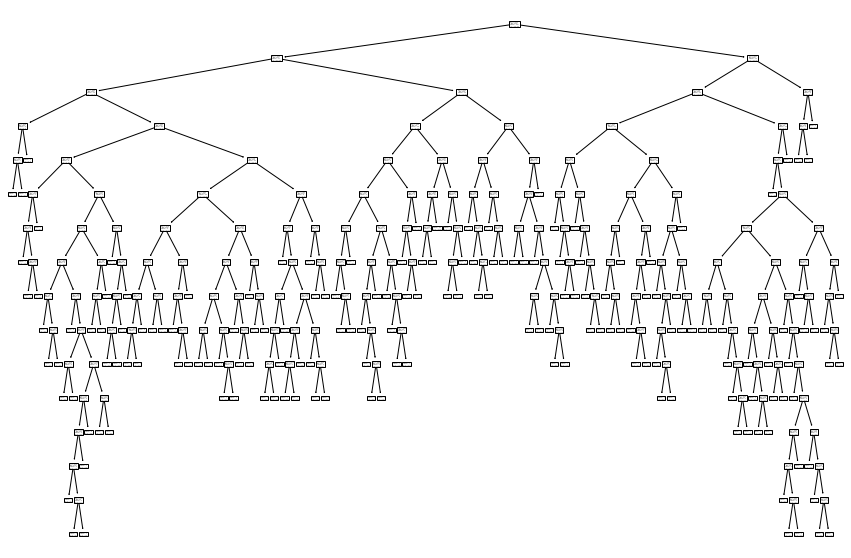

In [8]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,10))
plot_tree(dtc)
plt.show();


In [9]:
accuracy_score(y_test, dtc.predict(X_test))

0.773

Access to results:
- `predict` returns the class (0 or 1 if binary classifier)
- `predict_proba` returns the probability of each class



In [10]:
print("predict: \n",dtc.predict(X_test[:5]))
print("predict_proba: \n",dtc.predict_proba(X_test[:5]))

predict: 
 [1 1 1 0 1]
predict_proba: 
 [[0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


In [11]:
try:
  from mlxtend.plotting import plot_decision_regions
except ImportError as e:
  !pip install mlxtend
  from mlxtend.plotting import plot_decision_regions

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


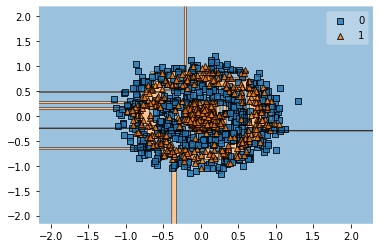

In [12]:
# practical but limited contour-plotting function
plot_decision_regions(X_test, y_test, dtc);

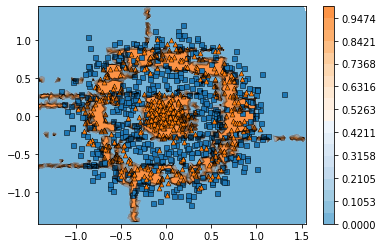

In [13]:
# defined at top of notebook
# can use class (0 or 1) or class probability when available
my_plot_decision_regions(dtc, X_test, y_test)

<Figure size 432x288 with 0 Axes>

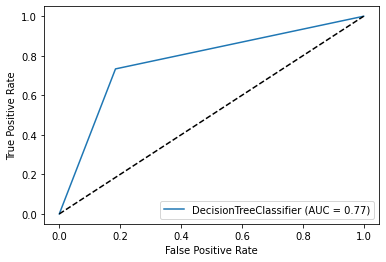

In [14]:
my_plot_roc_curve(dtc, X_test, y_test)

### AdaBoost

In [15]:
from sklearn.ensemble import AdaBoostClassifier

In [16]:
#abc = AdaBoostClassifier()
abc = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4),n_estimators=100)
abc.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=4,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

In [17]:
print("predict: \n",abc.predict(X_test[:5]))
print("predict_proba: \n",abc.predict_proba(X_test[:5]))

predict: 
 [1 1 1 0 1]
predict_proba: 
 [[0.18219013 0.81780987]
 [0.2697378  0.7302622 ]
 [0.46794236 0.53205764]
 [0.56211408 0.43788592]
 [0.26346077 0.73653923]]


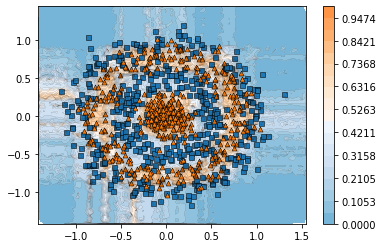

<Figure size 432x288 with 0 Axes>

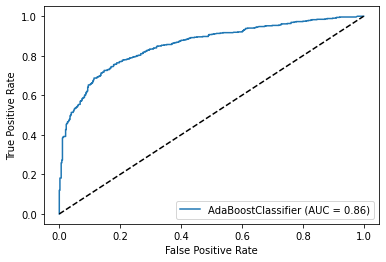

In [18]:
my_plot_decision_regions(abc, X_test, y_test)
my_plot_roc_curve(abc, X_test, y_test)

### Gradient boosting

In [19]:
from sklearn.ensemble import GradientBoostingClassifier

In [20]:
gbc = GradientBoostingClassifier(n_estimators=400)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=400,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [21]:
print("predict: \n",gbc.predict(X_test[:5]))
print("predict_proba: \n",gbc.predict_proba(X_test[:5]))

predict: 
 [1 1 1 0 0]
predict_proba: 
 [[0.02772398 0.97227602]
 [0.21257577 0.78742423]
 [0.20177229 0.79822771]
 [0.62777439 0.37222561]
 [0.69886414 0.30113586]]


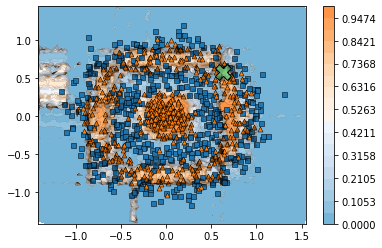

<Figure size 432x288 with 0 Axes>

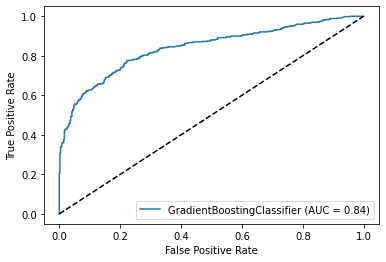

In [22]:
my_plot_decision_regions(gbc, X_test, y_test, event5=True)
my_plot_roc_curve(gbc, X_test, y_test)

### Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
rfc = RandomForestClassifier(n_estimators=400)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [25]:
print("predict: \n",rfc.predict(X_test[:5]))
print("predict_proba: \n",rfc.predict_proba(X_test[:5]))

predict: 
 [1 1 1 0 1]
predict_proba: 
 [[0.     1.    ]
 [0.2275 0.7725]
 [0.2525 0.7475]
 [0.5525 0.4475]
 [0.31   0.69  ]]


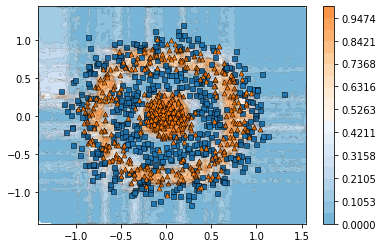

<Figure size 432x288 with 0 Axes>

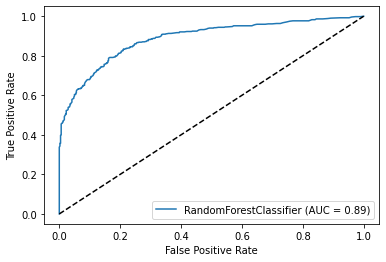

In [26]:
my_plot_decision_regions(rfc, X_test, y_test)
my_plot_roc_curve(rfc, X_test, y_test)

### Comparison

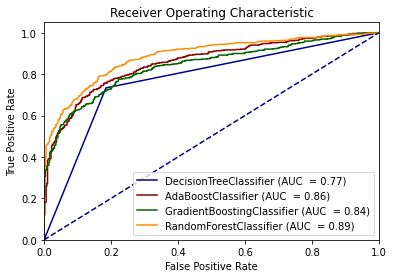

In [27]:
y_preds_dtc = dtc.predict_proba(X_test)[:,1].reshape(-1)
y_preds_abc = abc.predict_proba(X_test)[:,1].reshape(-1)
y_preds_gbc = gbc.predict_proba(X_test)[:,1].reshape(-1)
y_preds_rfc = rfc.predict_proba(X_test)[:,1].reshape(-1)
fpr_dtc,tpr_dtc,_ = roc_curve(y_true=y_test, y_score=y_preds_dtc)
fpr_abc,tpr_abc,_ = roc_curve(y_true=y_test, y_score=y_preds_abc)
fpr_gbc,tpr_gbc,_ = roc_curve(y_true=y_test, y_score=y_preds_gbc)
fpr_rfc,tpr_rfc,_ = roc_curve(y_true=y_test, y_score=y_preds_rfc)
auc_test_dtc = roc_auc_score(y_true=y_test, y_score=y_preds_dtc)
auc_test_abc = roc_auc_score(y_true=y_test, y_score=y_preds_abc)
auc_test_gbc = roc_auc_score(y_true=y_test, y_score=y_preds_gbc)
auc_test_rfc = roc_auc_score(y_true=y_test, y_score=y_preds_rfc)
plt.plot(fpr_dtc, tpr_dtc, color='darkblue',label='{} (AUC  = {})'.format(dtc.__class__.__name__,np.round(auc_test_dtc,decimals=2)))
plt.plot(fpr_abc, tpr_abc, color='darkred',label='{} (AUC  = {})'.format(abc.__class__.__name__,np.round(auc_test_abc,decimals=2)))
plt.plot(fpr_gbc, tpr_gbc, color='darkgreen',label='{} (AUC  = {})'.format(gbc.__class__.__name__,np.round(auc_test_gbc,decimals=2)))
plt.plot(fpr_rfc, tpr_rfc, color='darkorange',label='{} (AUC  = {})'.format(rfc.__class__.__name__,np.round(auc_test_rfc,decimals=2)))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right");


### Neural networks
It is possible to use neural networks from scikit-learn (`from sklearn.neural_network import MLPClassifier`). In the following we will use more advanced implementations with [Tensorflow](https://www.tensorflow.org).

In [28]:
try:
  import tensorflow as tf
except ImportError as e:
  !pip install tensorflow
  import tensorflow as tf
print (tf.__version__)  # preinstalled version 2.6.0 20210824
from tensorflow import keras

2.6.0


In [29]:
model = keras.models.Sequential(
    [
     keras.layers.Dense(128, activation='relu', input_shape=(2,)),
     keras.layers.Dense(128, activation='relu'),
     keras.layers.Dense(1, activation='sigmoid')
    ]
)

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy', keras.metrics.AUC()])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               384       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 17,025
Trainable params: 17,025
Non-trainable params: 0
_________________________________________________________________


In [30]:
model.fit(X_train, y_train,
          validation_split=0.2,
          epochs=1000,
          callbacks=[keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)])

Epoch 1/1000
25/25 [==============================] - 1s 14ms/step - loss: 0.6745 - accuracy: 0.5225 - auc: 0.6542 - val_loss: 0.6683 - val_accuracy: 0.5050 - val_auc: 0.7436
Epoch 2/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.6518 - accuracy: 0.6263 - auc: 0.7357 - val_loss: 0.6537 - val_accuracy: 0.7300 - val_auc: 0.7439
Epoch 3/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.6394 - accuracy: 0.7600 - auc: 0.7395 - val_loss: 0.6385 - val_accuracy: 0.7650 - val_auc: 0.7462
Epoch 4/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.6260 - accuracy: 0.7525 - auc: 0.7363 - val_loss: 0.6185 - val_accuracy: 0.7350 - val_auc: 0.7466
Epoch 5/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.6105 - accuracy: 0.7088 - auc: 0.7338 - val_loss: 0.6005 - val_accuracy: 0.7250 - val_auc: 0.7463
Epoch 6/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.5938 - accuracy: 0.6950 - auc: 0.7420 - val_loss: 0.5

In [31]:
print("predict: \n",model.predict(X_test[:5]))
accuracy_score(y_test, model.predict(X_test).round())

predict: 
 [[0.9999934 ]
 [0.83159244]
 [0.507123  ]
 [0.49645895]
 [0.7479508 ]]


0.824

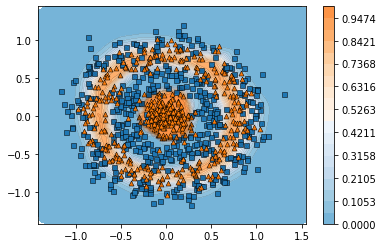

<Figure size 432x288 with 0 Axes>

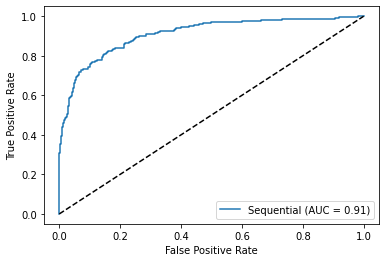

In [32]:
my_plot_decision_regions(model, X_test, y_test)
my_plot_roc_curve(model, X_test, y_test)

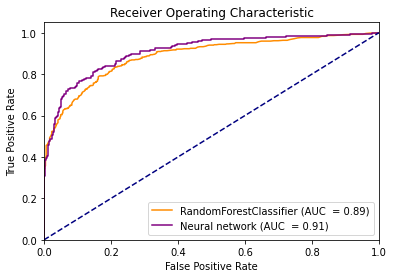

In [33]:
y_preds_model = model.predict(X_test)
fpr_model,tpr_model,_ = roc_curve(y_true=y_test, y_score=y_preds_model)
auc_test_model = roc_auc_score(y_true=y_test, y_score=y_preds_model)
plt.plot(fpr_rfc, tpr_rfc, color='darkorange',label='{} (AUC  = {})'.format(rfc.__class__.__name__,np.round(auc_test_rfc,decimals=2)))
plt.plot(fpr_model, tpr_model, color='purple',label='{} (AUC  = {})'.format("Neural network",np.round(auc_test_model,decimals=2)))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right");


# High energy physics application

## Input dataset

Data created from ATLAS Open Data by David Rousseau. See doc:

http://opendata.atlas.cern/release/2020/documentation/datasets/intro.html

### Downloading dataset

In [34]:
import os
filename="dataWW_d1_600k.csv.gz"
if not os.path.isfile(filename):
  try:
    import gdown
  except ImportError as e:
    !pip install gdown
    import gdown
  !gdown https://drive.google.com/uc?id=1nlXp7P-xq_jip4aPE0j0mnPhYnIOcBv4
!ls -lrt

# Loading dataset
dfall = pd.read_csv(filename) 
print ("\nFile loaded with ",dfall.shape[0], " events ")


total 35140
drwxr-xr-x 1 root root     4096 Aug 25 13:35 sample_data
-rw-r--r-- 1 root root 35905611 Aug 31 09:06 dataWW_d1_600k.csv.gz
drwxr-xr-x 4 root root     4096 Aug 31 14:06 NNmodel
-rw-r--r-- 1 root root    37840 Aug 31 14:07 NNmodel.h5
-rw-r--r-- 1 root root     1298 Aug 31 14:16 NNmodel.json
-rw-r--r-- 1 root root    17080 Aug 31 14:16 NNmodel_weights.h5

File loaded with  600000  events 


After downloading message and directory listing, you should now see:

`File loaded with  600000  events`

### Checking the content

In [35]:
#dumping list of features
dfall.columns

Index(['eventNumber', 'label', 'met_et', 'met_phi', 'lep_n', 'lep_pt_0',
       'lep_pt_1', 'lep_eta_0', 'lep_eta_1', 'lep_phi_0', 'lep_phi_1',
       'lep_E_0', 'lep_E_1', 'lep_charge_0', 'lep_charge_1', 'lep_type_0',
       'lep_type_1', 'jet_n', 'jet_pt_0', 'jet_pt_1', 'jet_eta_0', 'jet_eta_1',
       'jet_phi_0', 'jet_phi_1', 'jet_E_0', 'jet_E_1', 'mcWeight', 'runNumber',
       'channelNumber'],
      dtype='object')

In [36]:
#examining first few events
display(dfall.head())

,eventNumber,label,met_et,met_phi,lep_n,lep_pt_0,lep_pt_1,lep_eta_0,lep_eta_1,lep_phi_0,lep_phi_1,lep_E_0,lep_E_1,lep_charge_0,lep_charge_1,lep_type_0,lep_type_1,jet_n,jet_pt_0,jet_pt_1,jet_eta_0,jet_eta_1,jet_phi_0,jet_phi_1,jet_E_0,jet_E_1,mcWeight,runNumber,channelNumber
0,249632,1,25.118,1.14010,2,46.439,44.589,0.131030,0.40654,2.34760,-2.41510,46838.0,48325.0,1,-1,13,11,1,53.680,-7.000,2.4346,-7.00000,-0.76667,-7.00000,308720.0,-7.0,0.000002,284500,345323
1,892975,1,27.974,0.84442,2,86.819,55.438,-0.017265,-0.16338,-1.44520,-1.72950,86832.0,56179.0,1,-1,11,13,1,126.700,-7.000,-1.2789,-7.00000,1.66290,-7.00000,245670.0,-7.0,0.000002,284500,345323
2,730573,0,123.290,-2.94810,2,105.810,40.506,-1.338900,-1.03500,0.68539,-0.90527,215700.0,64211.0,1,-1,13,13,0,-7.000,-7.000,-7.0000,-7.00000,-7.00000,-7.00000,-7.0,-7.0,0.002468,284500,363492
3,717584,0,78.558,1.04450,2,56.666,35.124,2.294600,1.88700,2.13110,-2.83820,283930.0,118570.0,-1,1,11,11,2,79.799,53.942,1.6270,0.55314,-1.84880,-0.47055,211610.0,63629.0,0.000197,284500,363492
4,319020,0,15.863,0.74840,2,94.708,72.811,0.812740,0.77954,1.84940,0.45967,127750.0,96077.0,-1,1,11,11,1,143.180,-7.000,-0.6358,-7.00000,-1.91230,-7.00000,173810.0,-7.0,0.000197,284500,363492


In [37]:
#examining feature distributions
dfall.describe()

,eventNumber,label,met_et,met_phi,lep_n,lep_pt_0,lep_pt_1,lep_eta_0,lep_eta_1,lep_phi_0,lep_phi_1,lep_E_0,lep_E_1,lep_charge_0,lep_charge_1,lep_type_0,lep_type_1,jet_n,jet_pt_0,jet_pt_1,jet_eta_0,jet_eta_1,jet_phi_0,jet_phi_1,jet_E_0,jet_E_1,mcWeight,runNumber,channelNumber
count,6.000000e+05,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,6.000000e+05,6.000000e+05,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,6.000000e+05,6.000000e+05,600000.000000,600000.0,600000.000000
mean,7.029775e+05,0.666667,60.365356,-0.008556,2.005748,60.270328,28.133970,0.000269,-0.000664,0.005219,0.008524,1.164008e+05,5.630948e+04,-0.027027,0.027037,11.907273,11.958010,1.334185,59.606114,13.521164,-1.934521,-4.402337,-1.939645,-4.401941,1.375410e+05,4.125468e+04,0.000218,284500.0,351379.666667
std,4.568961e+05,0.471405,48.153210,1.812778,0.076061,42.676858,20.352272,1.210614,1.235890,1.811177,1.814205,1.083341e+05,5.748834e+04,0.999636,0.999635,0.995692,0.999119,1.232632,79.586143,38.074439,3.349404,3.491304,3.489197,3.559421,1.980717e+05,8.990068e+04,0.000736,0.0,8564.720183
min,1.000000e+00,0.000000,0.044211,-3.141600,2.000000,25.000000,7.000300,-2.700000,-2.699900,-3.141600,-3.141600,2.501300e+04,7.003800e+03,-1.000000,-1.000000,11.000000,11.000000,0.000000,-7.000000,-7.000000,-7.000000,-7.000000,-7.000000,-7.000000,-7.000000e+00,-7.000000e+00,-0.045557,284500.0,345323.000000
25%,3.498568e+05,0.000000,33.196000,-1.577600,2.000000,36.624750,15.316000,-0.899650,-0.946043,-1.560200,-1.562900,5.221675e+04,2.329100e+04,-1.000000,-1.000000,11.000000,11.000000,0.000000,-7.000000,-7.000000,-7.000000,-7.000000,-7.000000,-7.000000,-7.000000e+00,-7.000000e+00,0.000002,284500.0,345323.000000
50%,6.678815e+05,1.000000,50.082000,-0.018694,2.000000,48.229500,23.644000,0.003413,0.002974,0.014583,0.018823,8.184450e+04,3.824900e+04,-1.000000,1.000000,11.000000,11.000000,1.000000,38.744000,-7.000000,-0.891010,-7.000000,-1.210600,-7.000000,7.501700e+04,-7.000000e+00,0.000029,284500.0,345324.000000
75%,1.001273e+06,1.000000,73.032250,1.559300,2.000000,68.979000,34.149000,0.901950,0.942210,1.573000,1.577300,1.412400e+05,6.730825e+04,1.000000,1.000000,13.000000,13.000000,2.000000,84.291250,26.881000,0.724705,-0.821005,0.967753,-1.088575,1.766200e+05,5.060500e+04,0.000197,284500.0,363492.000000
max,1.997995e+06,1.000000,7062.200000,3.141600,5.000000,7041.400000,744.900000,2.699800,2.700000,3.141500,3.141600,7.041600e+06,2.107900e+06,1.000000,1.000000,13.000000,13.000000,13.000000,1658.200000,1429.800000,2.500000,2.500000,3.141600,3.141600,5.638800e+06,2.784300e+06,0.052420,284500.0,363492.000000


Event weights

In [38]:
label_nevents = (dfall[dfall.label==0].shape[0], dfall[dfall.label==1].shape[0] )
print("Number of events per class (B, S):",label_nevents)

label_weights = (dfall[dfall.label==0].mcWeight.sum(), dfall[dfall.label==1].mcWeight.sum() ) 
print("Total weight per class (B, S):    ",label_weights)

Number of events per class (B, S): (200000, 400000)
Total weight per class (B, S):     (124.66229446419997, 6.200053397600001)


## Event selection

Only keep events with exactly two leptons for this exercise.

Only keep events with positive weight, as many ML tools choke on negative weight.

*Note: This is in principle WRONG, only valid if your positive and negative weight events are statistically similar (could then also take the absolute value of the weight to increase statistics).*


In [39]:
print ("Df shape before selection:", dfall.shape)

fulldata=dfall[ (dfall.lep_n==2) & (dfall.mcWeight > 0)]  

print ("Df shape after selection: ",fulldata.shape)

Df shape before selection: (600000, 29)
Df shape after selection:  (577357, 29)


In [40]:
# Hide label and weights in separate vectors (not discriminating features)
# WARNING : there should be neither selection nor shuffling later on! (otherwise misalignement)
target = fulldata["label"]
weights = fulldata["mcWeight"]

# for simplicity only keep some features
# this is actually making a deep copy from fulldata
data=pd.DataFrame(fulldata, columns=["met_et","met_phi","lep_pt_0","lep_pt_1",'lep_phi_0', 'lep_phi_1'])
#data=pd.DataFrame(fulldata, columns=["met_et","met_phi","lep_pt_0","lep_pt_1",'lep_eta_0', 'lep_eta_1', 'lep_phi_0', 'lep_phi_1','jet_n','jet_pt_0',
#       'jet_pt_1', 'jet_eta_0', 'jet_eta_1', 'jet_phi_0', 'jet_phi_1']

print ("Df shape of dataset to be used:",data.shape)

Df shape of dataset to be used: (577357, 6)


### Event weights

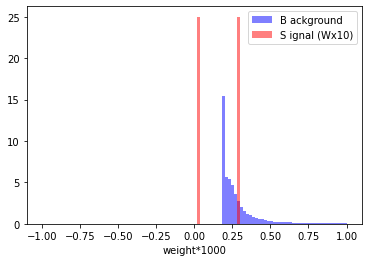

In [41]:
fig,ax=plt.subplots()

bins=np.linspace(-1,1,101)
plt.hist(weights[target==0]*1000,bins=bins,color='b',alpha=0.5,density=True,label='B ackground')
plt.hist(weights[target==1]*10000,bins=bins,color='r',alpha=0.5,density=True,label='S ignal (Wx10)')
plt.legend(loc='best')
ax.set_xlabel('weight*1000')
plt.show()

### Plotting variables

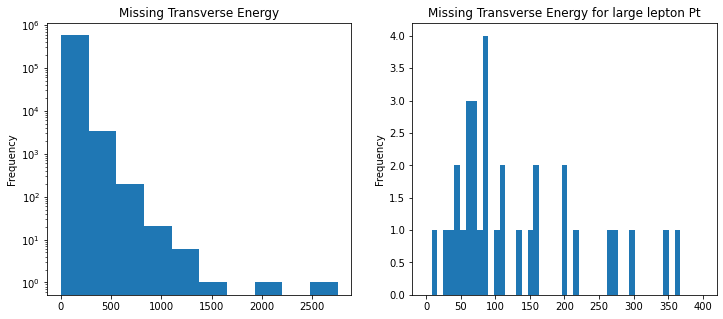

In [42]:
fig,ax=plt.subplots(1, 2, figsize=(12, 5))
data['met_et'].plot.hist(title='Missing Transverse Energy', log=True, ax=ax[0])
data[data.lep_pt_0+data.lep_pt_1>1000]['met_et'].plot.hist(bins=np.linspace(0,400,50),title='Missing Transverse Energy for large lepton Pt', ax=ax[1]);

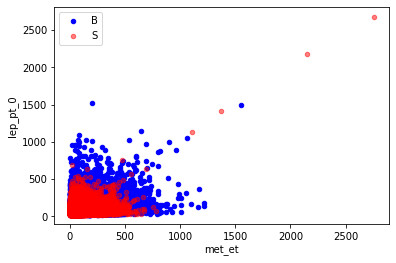

In [43]:
ax=data[target==0].plot.scatter(x='met_et', y='lep_pt_0',color="b",label="B")
data[target==1].plot.scatter(x='met_et', y='lep_pt_0',color="r",label="S",alpha=.5,ax=ax);

In [44]:
data[data.lep_pt_0+data.lep_pt_1>2000].head()

,met_et,met_phi,lep_pt_0,lep_pt_1,lep_phi_0,lep_phi_1
191279,2755.4,1.8538,2678.7,42.131,-1.2958,0.13151
219617,2145.7,0.3056,2180.0,30.531,-2.8257,1.50800


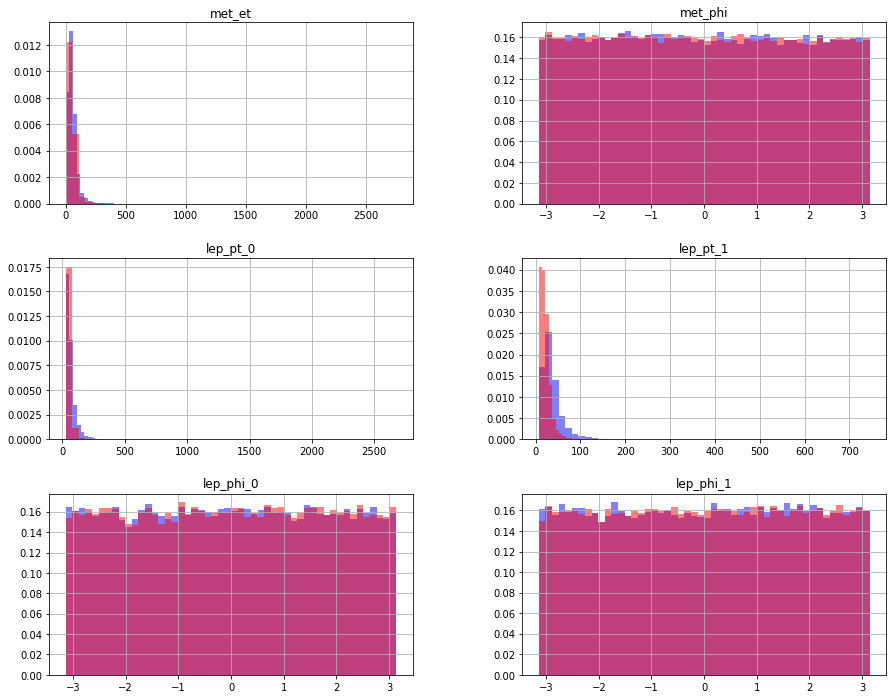

In [45]:
ax=data[target==0].hist(weights=weights[target==0],figsize=(15,12),bins=50,color='b',alpha=0.5,density=True,label="B")
ax=ax.flatten()[:data.shape[1]] # to avoid error if holes in the grid of plots (like if 7 or 8 features)
data[target==1].hist(weights=weights[target==1],figsize=(15,12),bins=50,color='r',alpha=0.5,density=True,ax=ax,label="S");


### Features correlation matrix

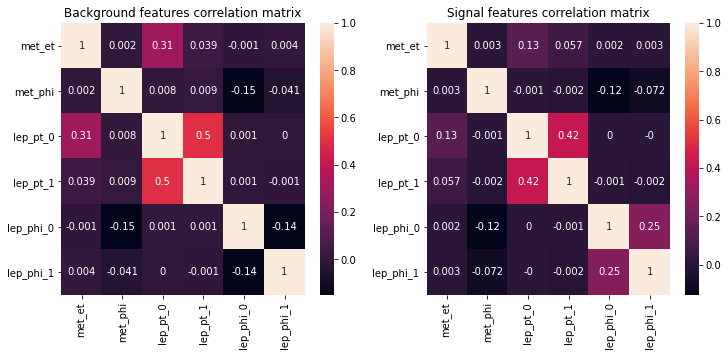

In [46]:
fig,ax=plt.subplots(1, 2, figsize=(12, 5))

corrMatrix = data[target==0].corr()
ax[0].set_title("Background features correlation matrix")
sns.heatmap(corrMatrix.round(3), ax=ax[0], annot=True);

corrMatrix = data[target==1].corr()
ax[1].set_title("Signal features correlation matrix")
sns.heatmap(corrMatrix.round(3), ax=ax[1], annot=True);


## Sample splitting

In [47]:
np.random.seed(31415) # set the random seed (used for the train/test splitting)

from sklearn.model_selection import train_test_split
train_size = 0.75 # fraction of sample used for training

X_train, X_test, y_train, y_test, weights_train, weights_test = \
    train_test_split(data, target, weights, train_size=train_size)

print("Training sample:", X_train.shape)
print("Testing sample:", X_test.shape)

class_weights_train = (weights_train[y_train == 0].sum(), weights_train[y_train == 1].sum())
print ("class_weights_train (B, S):",class_weights_train)

for i in range(len(class_weights_train)):
    weights_train[y_train == i] *= max(class_weights_train)/ class_weights_train[i] #equalize number of background and signal event
    weights_test[y_test == i] *= 1/(1-train_size) # increase test weight to compensate for sampling
    
print ("Test:  total weight sig", weights_test[y_test == 1].sum())
print ("Test:  total weight bkg", weights_test[y_test == 0].sum())
print ("Train: total weight sig", weights_train[y_train == 1].sum())
print ("Train: total weight bkg", weights_train[y_train == 0].sum())



Training sample: (433017, 6)
Testing sample: (144340, 6)
class_weights_train (B, S): (119.6198167571, 4.637818587600001)
Test:  total weight sig 6.166318648
Test:  total weight bkg 160.27470056999996
Train: total weight sig 119.61981675709993
Train: total weight bkg 119.6198167571


## Network training

In [48]:
try:
  import tensorflow as tf
except ImportError as e:
  !pip install tensorflow
  import tensorflow as tf
print (tf.__version__)  # preinstalled version 2.6.0 20210824
from tensorflow import keras

2.6.0


In [49]:
tf.random.set_seed(1234) # to have reproducible networks
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(X_train.shape[1],)), # input layer
  tf.keras.layers.Dense(128, activation='relu'), # 1st hiddden layer
  #tf.keras.layers.Dense(128, activation='relu'), # 2nd hidden layer
  tf.keras.layers.Dense(1,activation="sigmoid") # output layer
])

model.compile(loss="binary_crossentropy",
              optimizer="adam",
              weighted_metrics=['accuracy', keras.metrics.AUC(name="auc")])

history = model.fit(X_train, y_train.values,
                    epochs=5,
                    validation_split=0.2,
                    batch_size=1024,
                    sample_weight=weights_train.values)

Epoch 1/5
339/339 [==============================] - 13s 36ms/step - loss: 4.2277e-04 - accuracy: 0.6292 - auc: 0.6738 - val_loss: 3.3669e-04 - val_accuracy: 0.6880 - val_auc: 0.7355
Epoch 2/5
339/339 [==============================] - 1s 3ms/step - loss: 3.2740e-04 - accuracy: 0.7017 - auc: 0.7590 - val_loss: 3.2083e-04 - val_accuracy: 0.7199 - val_auc: 0.7794
Epoch 3/5
339/339 [==============================] - 1s 3ms/step - loss: 3.1909e-04 - accuracy: 0.7134 - auc: 0.7727 - val_loss: 3.1608e-04 - val_accuracy: 0.7228 - val_auc: 0.7831
Epoch 4/5
339/339 [==============================] - 1s 3ms/step - loss: 3.1467e-04 - accuracy: 0.7186 - auc: 0.7800 - val_loss: 3.1124e-04 - val_accuracy: 0.7263 - val_auc: 0.7880
Epoch 5/5
339/339 [==============================] - 1s 3ms/step - loss: 3.0840e-04 - accuracy: 0.7240 - auc: 0.7887 - val_loss: 3.0336e-04 - val_accuracy: 0.7295 - val_auc: 0.7969


### Standardisation of inputs


In [50]:
from sklearn.preprocessing import StandardScaler

print("Original mean and variance:")
for feature, mean, std in zip(data.columns,X_train.mean(0), X_train.std(0)):
  print("{:9}: {:7.4f} +/- {:7.4f}".format(feature,mean,std))

# Standardize features by removing the mean and scaling to unit variance
# in training sample
scaler = StandardScaler()
# ".values[:]" to keep dataframe and not convert to numpy array
X_train.values[:] = scaler.fit_transform(X_train)
# apply to testing sample the transformation calculated on training sample
X_test.values[:] = scaler.transform(X_test)

print("\nStandardised mean and variance:")
for feature, mean, std in zip(data.columns,X_train.mean(0), X_train.std(0)):
  print("{:9}: {:7.4f} +/- {:7.4f}".format(feature,mean,std))

Original mean and variance:
met_et   : 60.4814 +/- 46.8939
met_phi  : -0.0076 +/-  1.8125
lep_pt_0 : 60.0763 +/- 41.1112
lep_pt_1 : 27.8556 +/- 20.1163
lep_phi_0:  0.0051 +/-  1.8109
lep_phi_1:  0.0101 +/-  1.8133

Standardised mean and variance:
met_et   :  0.0000 +/-  1.0000
met_phi  :  0.0000 +/-  1.0000
lep_pt_0 :  0.0000 +/-  1.0000
lep_pt_1 :  0.0000 +/-  1.0000
lep_phi_0: -0.0000 +/-  1.0000
lep_phi_1:  0.0000 +/-  1.0000


In [51]:
tf.random.set_seed(1234) # to have reproducible networks
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(X_train.shape[1],)), # input layer
  tf.keras.layers.Dense(128, activation='relu'), # 1st hiddden layer
  #tf.keras.layers.Dense(128, activation='relu'), # 2nd hidden layer
  tf.keras.layers.Dense(1,activation="sigmoid") # output layer
])

model.compile(loss="binary_crossentropy",
              optimizer="adam",
              weighted_metrics=['accuracy', keras.metrics.AUC(name="auc")])

history = model.fit(X_train, y_train.values,
                    epochs=5,
                    validation_split=0.2,
                    batch_size=1024,
                    sample_weight=weights_train.values)

y_pred_model = model.predict(X_test)

Epoch 1/5
339/339 [==============================] - 13s 37ms/step - loss: 3.1329e-04 - accuracy: 0.7167 - auc: 0.7807 - val_loss: 2.9466e-04 - val_accuracy: 0.7385 - val_auc: 0.8089
Epoch 2/5
339/339 [==============================] - 1s 3ms/step - loss: 2.9089e-04 - accuracy: 0.7402 - auc: 0.8122 - val_loss: 2.8556e-04 - val_accuracy: 0.7491 - val_auc: 0.8210
Epoch 3/5
339/339 [==============================] - 1s 3ms/step - loss: 2.8379e-04 - accuracy: 0.7496 - auc: 0.8220 - val_loss: 2.7987e-04 - val_accuracy: 0.7546 - val_auc: 0.8315
Epoch 4/5
339/339 [==============================] - 1s 3ms/step - loss: 2.7726e-04 - accuracy: 0.7582 - auc: 0.8306 - val_loss: 2.7209e-04 - val_accuracy: 0.7691 - val_auc: 0.8380
Epoch 5/5
339/339 [==============================] - 1s 3ms/step - loss: 2.7090e-04 - accuracy: 0.7658 - auc: 0.8382 - val_loss: 2.6589e-04 - val_accuracy: 0.7742 - val_auc: 0.8456


Compare the training loss/accuracy/AUC with that obtained before standardisation.

### Training monitoring

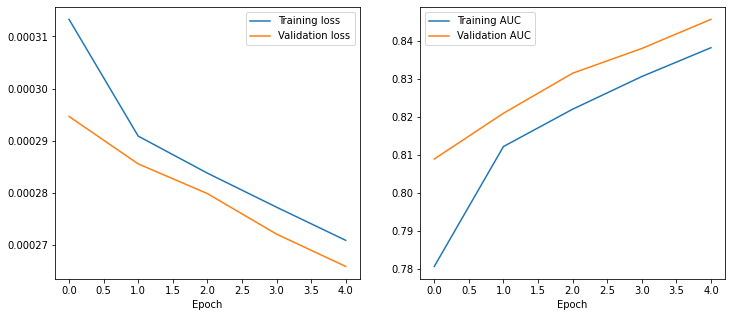

In [52]:
fig,ax=plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(history.history['loss'],label="Training loss")
ax[0].plot(history.history['val_loss'],label="Validation loss")
ax[0].set_xlabel("Epoch")
ax[0].legend(loc='best');

ax[1].plot(history.history['auc'],label="Training AUC")
ax[1].plot(history.history['val_auc'],label="Validation AUC")
ax[1].set_xlabel("Epoch")
ax[1].legend(loc='best');

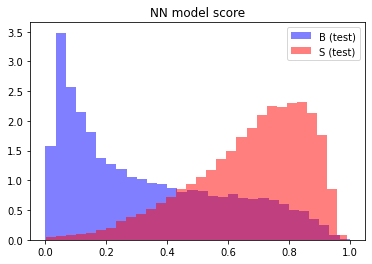

In [53]:
density=True   # normalised to 1 (=> probability density function)
#density=False   # normalised to one year at LHC

plt.hist(y_pred_model[y_test == 0],
         color='b', alpha=0.5, 
         bins=30,
         histtype='stepfilled', density=density,
         label='B (test)', weights=weights_test[y_test == 0])
plt.hist(y_pred_model[y_test == 1],
         color='r', alpha=0.5,
         bins=30,
         histtype='stepfilled', density=density,
         label='S (test)', weights=weights_test[y_test == 1])
plt.legend()
plt.title("NN model score");

### Model saving

***Whole-model saving & loading***

You can save an entire model to a directory. It will include:
- the model's architecture/config
- the model's weight values (which were learned during training)
- the model's compilation information (if `compile()` was called)
- the optimizer and its state, if any (this enables you to restart training where you left)


In [94]:
model.save("NNmodel")
!ls -a NNmodel/*

INFO:tensorflow:Assets written to: NNmodel/assets
NNmodel/keras_metadata.pb  NNmodel/saved_model.pb

NNmodel/assets:
.  ..

NNmodel/variables:
.  ..  variables.data-00000-of-00001  variables.index


In [90]:
print("Prediction from original model:")
display(model.predict(X_test[:5]))

reloaded_model=keras.models.load_model("NNmodel")
print("Prediction from reloaded model:")
display(reloaded_model.predict(X_test[:5]))
#np.testing.assert_allclose(
#    model.predict(X_test), reloaded_model.predict(X_test)
#)

# further training
reloaded_model.fit(X_train, y_train.values,
                   epochs=1,
                   validation_split=0.2,
                   sample_weight=weights_train.values)

Prediction from original model:


array([[0.32294896],
       [0.21759936],
       [0.7814982 ],
       [0.4702888 ],
       [0.75246096]], dtype=float32)

Prediction from reloaded model:


array([[0.32294896],
       [0.21759936],
       [0.7814982 ],
       [0.4702888 ],
       [0.75246096]], dtype=float32)

13532/13532 [==============================] - 23s 2ms/step - loss: 2.5380e-04 - accuracy: 0.7965 - auc_5: 0.8525


***Partial save***

Save a single HDF5 file containing the model's architecture, weights values, and `compile()` information.

Not saved (to be provided separately to resume training):
- external losses & metrics added via `model.add_loss()` & `model.add_metric()`
- computation graph of custom objects

In [96]:
model.save("NNmodel.h5")
!ls -lrt --color
print("\nPrediction from original model:")
display(model.predict(X_test[:5]))

reloaded_model=keras.models.load_model("NNmodel.h5")
print("Prediction from reloaded model:")
display(reloaded_model.predict(X_test[:5]))

total 35116
drwxr-xr-x 1 root root     4096 Aug 25 13:35 sample_data
-rw-r--r-- 1 root root 35905611 Aug 31 09:06 dataWW_d1_600k.csv.gz
drwxr-xr-x 4 root root     4096 Aug 31 14:06 NNmodel
-rw-r--r-- 1 root root    37840 Aug 31 14:07 NNmodel.h5

Prediction from original model:


array([[0.32294896],
       [0.21759936],
       [0.7814982 ],
       [0.4702888 ],
       [0.75246096]], dtype=float32)

Prediction from reloaded model:


array([[0.32294896],
       [0.21759936],
       [0.7814982 ],
       [0.4702888 ],
       [0.75246096]], dtype=float32)

13532/13532 [==============================] - 22s 2ms/step - loss: 2.5376e-04 - accuracy: 0.7966 - auc_5: 0.8526


***Saving the architecture and weights***

Keeping the model's configuration and training weights in separate files

In [97]:
arch = model.to_json()
with open('NNmodel.json', 'w') as arch_file:
  arch_file.write(arch)
model.save_weights('NNmodel_weights.h5')
!ls -lrt --color

total 35140
drwxr-xr-x 1 root root     4096 Aug 25 13:35 sample_data
-rw-r--r-- 1 root root 35905611 Aug 31 09:06 dataWW_d1_600k.csv.gz
drwxr-xr-x 4 root root     4096 Aug 31 14:06 NNmodel
-rw-r--r-- 1 root root    37840 Aug 31 14:07 NNmodel.h5
-rw-r--r-- 1 root root     1298 Aug 31 14:16 NNmodel.json
-rw-r--r-- 1 root root    17080 Aug 31 14:16 NNmodel_weights.h5


In [109]:
!python -m json.tool NNmodel.json

{
    "class_name": "Sequential",
    "config": {
        "name": "sequential_7",
        "layers": [
            {
                "class_name": "InputLayer",
                "config": {
                    "batch_input_shape": [
                        null,
                        6
                    ],
                    "dtype": "float32",
                    "sparse": false,
                    "ragged": false,
                    "name": "flatten_6_input"
                }
            },
            {
                "class_name": "Flatten",
                "config": {
                    "name": "flatten_6",
                    "trainable": true,
                    "batch_input_shape": [
                        null,
                        6
                    ],
                    "dtype": "float32",
                    "data_format": "channels_last"
                }
            },
            {
                "class_name": "Dense",
                "config": {
       

In [115]:
with open('NNmodel.json', 'r') as f:
  reloaded_model = keras.models.model_from_json(f.read())
reloaded_model.summary()

reloaded_model.load_weights("NNmodel_weights.h5")
#reloaded_model.compile(loss="binary_crossentropy",
#                       optimizer="adam",
#                       validation_split=0.2,
#                       metrics=['accuracy', keras.metrics.AUC()])
reloaded_model.fit(X_train, y_train.values,
                   epochs=1,
                   sample_weight=weights_train.values)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 6)                 0         
_________________________________________________________________
dense_15 (Dense)             (None, 128)               896       
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 129       
Total params: 1,025
Trainable params: 1,025
Non-trainable params: 0
_________________________________________________________________
13532/13532 [==============================] - 22s 2ms/step - loss: 2.5380e-04 - accuracy: 0.7965 - auc_7: 0.8525


# **Installation checks**

In [141]:
data["lep_deltaphi"]=np.abs(np.mod(data.lep_phi_1-data.lep_phi_0+3*np.pi,2*np.pi)-np.pi)


## XGBoost

In [175]:
# preinstalled version 0.9.0 20210824
!pip install xgboost --upgrade # install 1.4.2 20210824
import xgboost as xgb
print(xgb.__version__)

     |████████████████████████████████| 166.7 MB 19 kB/s 
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90
1.4.2


In [179]:
np.random.seed(31415) # set the random seed

from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score # for binary classification if x > 0.5 -> 1 else -> 0
# tree_method="hist" is 10 times faster, however less robust against awkwards features (not a bad idea to double check without it)
# can even try tree_method="gpu_hist" if proper GPU installation
# use_label_encoder and eval_metric to silence warning in 1.3.0
xgb = XGBClassifier(tree_method="hist",use_label_encoder=False,eval_metric='logloss')
# HPO (==Hyper Parameter Optimization), check on the web https://xgboost.readthedocs.io/ for other parameters
#xgb = XGBClassifier(tree_method="hist",use_label_encoder=False,max_depth=10,n_estimators=100) 

xgb.fit(X_train, y_train.values, sample_weight=weights_train.values) # note that XGB 1.3.X requires positive weight

print(xgb.predict_proba(X_test)[:,1][:5])


[0.01469594 0.01831483 0.02756097 0.06817186 0.07718151]


## LightGBM

In [ ]:
# preinstalled version 2.2.3 20210824
!pip install lightgbm --upgrade # install 3.2.1 20210824
import lightgbm as lgb
print (lgb.__version__)

     |████████████████████████████████| 2.0 MB 4.3 MB/s 
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 2.2.3
    Uninstalling lightgbm-2.2.3:
      Successfully uninstalled lightgbm-2.2.3
3.2.1


In [ ]:
try:
  import tensorflow as tf
except ImportError as e:
  !pip install tensorflow
  import tensorflow as tf
print (tf.__version__)  # preinstalled version 2.6.0 20210824

2.6.0


# Feature importance
Feature importance allows to display the importance of each feature without rerunnning the training. It is obtained from internal algorithm quantities, like number of time a feature is used to definea leaf. Magnitude is arbitrary. It can be used as a not very reliable indication of which feature is the most discriminant.

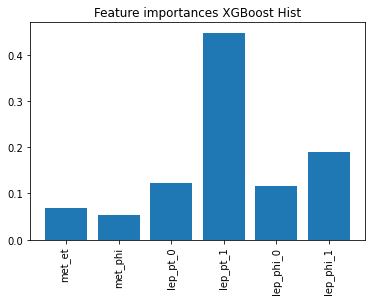

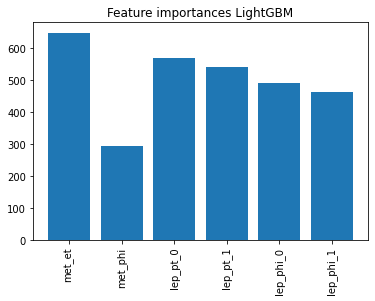

In [ ]:
plt.bar(data.columns.values, xgb.feature_importances_)
plt.xticks(rotation=90)
plt.title("Feature importances XGBoost Hist")
#plt.savefig(new_dir + "/VarImp_BDT_XGBoost_Hist.pdf",bbox_inches='tight')
plt.show()
plt.bar(data.columns.values, gbm.feature_importances_)
plt.xticks(rotation=90)
plt.title("Feature importances LightGBM")
#plt.savefig(new_dir + "/VarImp_BDT_LightGBM.pdf",bbox_inches='tight')
plt.show()


# Permutation importance

A better way to show the importance of each feature is Permutation Importance, where each feature in turn is replaced by an instance of an other event (effectively switching it off by randomising).

However, report can be misleading in case of highly correlated variables.

Available in [Scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.permutation_importance.html]) but without event weights in Colab version (0.22).
   


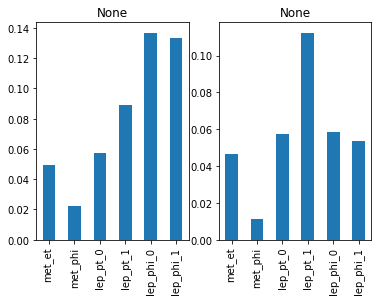

In [ ]:
if True:
  from sklearn.inspection import permutation_importance
  result_xgb = permutation_importance(xgb, X_test, y_test, n_repeats=1, random_state=42, n_jobs=2)
  forest_importances_xgb = pd.Series(result_xgb.importances_mean, index=list(data.columns.values))

  result_gbm = permutation_importance(gbm, X_test, y_test, n_repeats=1, random_state=42, n_jobs=2)
  forest_importances_gbm = pd.Series(result_gbm.importances_mean, index=list(data.columns.values))

  fig, ax = plt.subplots(1,2)
  ax
  forest_importances_xgb.plot.bar(ax = ax[0], subplots=True)
  forest_importances_gbm.plot.bar(ax = ax[1], subplots=True)


Another implementation targetting HEP:

https://github.com/aghoshpub/permutationImportancePhysics 

In particular it allows to : 
   * use event weights
   * display directly the loss in whatever criterion (ROC auc, asimov significance) when the feature is switched off
   * display the feature importance for a specific subset (for example the most signal like)
   * it can even display which feature has the largest impact on systematics


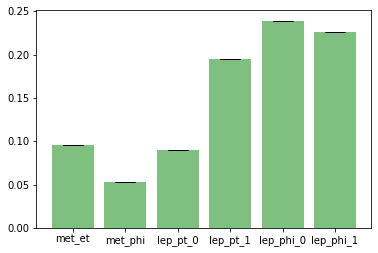

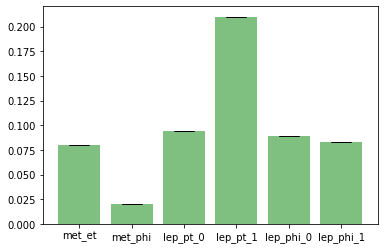

In [ ]:
if True:
    !pip install PermutationImportancePhysics
    from permutationimportancephysics.PermutationImportance import PermulationImportance # note the delibrate typo PermuLation
    PI_xgb = PermulationImportance(model=xgb, X=X_test,y=y_test,weights=weights_test,\
                           n_iterations=1,usePredict_poba=True, scoreFunction="amsasimov", colNames=list(data.columns.values))
    #PI_xgb.dislayResults()
    plott_xgb = PI_xgb.plotBars()
    plott_xgb.show()
    PI_gbm = PermulationImportance(model=gbm, X=X_test,y=y_test,weights=weights_test,\
                           n_iterations=1,usePredict_poba=True, scoreFunction="amsasimov", colNames=list(data.columns.values))
    #PI_gbm.dislayResults()
    plott_gbm = PI_gbm.plotBars()
    plott_gbm.show()
